## Project 10

In [1]:
%config Completer.use_jedi = False

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import k_means

Community graph - taken from Project5

## 5.3

<AxesSubplot:>

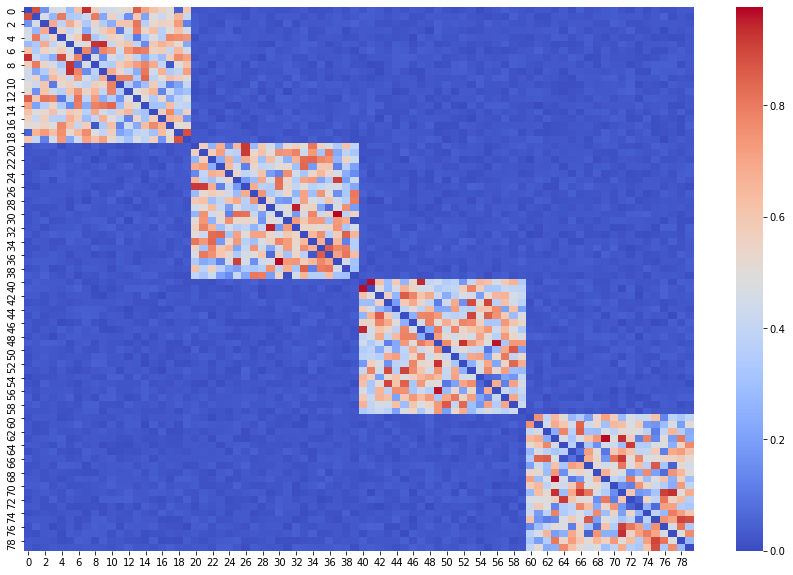

In [3]:
N=20 
Q=4
communities = [np.random.rand(N, N) for _ in range(Q)] # four random matrices with values between 0 and 1 
between = np.random.rand(N*Q, N*Q)* 0.05 # random matrix with values between 0 and 0.05
for i in range(Q):
    between[i*N:(i+1)*N, i*N:(i+1)*N] = communities[i]
# to make the matrix symmetric
probability_matrix = (between + between.transpose())/2
np.fill_diagonal(probability_matrix, 0)
sns.heatmap(probability_matrix, cmap='coolwarm', ax=plt.subplots(figsize=(15,10))[1]) # probability matrix 

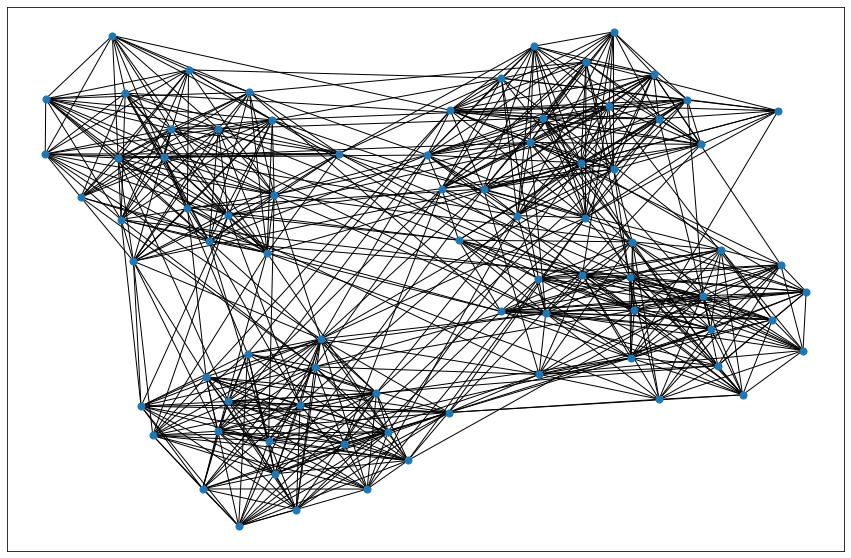

In [4]:
adjacency = probability_matrix > np.random.rand(N*Q, N*Q)  
G = nx.convert_matrix.from_numpy_array(adjacency)
nx.draw_networkx(G, nx.spring_layout(G, iterations=10000), with_labels=False, node_size=50,ax=plt.subplots(figsize=(15,10))[1])

# 10.1

In [5]:
K = 4

In [6]:
def prepare_laplacian(A: np.matrix) -> np.matrix:
    """Given an adjacency matrix, computes the laplacian matrix"""
    return A - np.diag(A.sum(axis=0))
L = prepare_laplacian(adjacency)
L

array([[-13,   1,   1, ...,   0,   0,   0],
       [  1, -13,   0, ...,   0,   1,   0],
       [  0,   0, -13, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., -12,   1,   1],
       [  0,   0,   0, ...,   1, -16,   0],
       [  0,   0,   0, ...,   1,   1,  -9]])

In [7]:
def get_features(L: np.matrix) -> np.matrix:
    """Given a Laplacian matrix, return the feature vector based on eigenvalues"""
    eigval, eigvect = np.linalg.eig(L)
    K_largest_eigvals_indices = np.argsort(-np.real(eigval))[:K]
    return eigvect[:, K_largest_eigvals_indices]
features = pd.DataFrame(np.real(get_features(L)))
features[:10]

,0,1,2,3
0,-0.061813,0.007586,-0.162954,0.004150
1,-0.067546,-0.009085,-0.128693,0.012719
2,-0.056544,0.007348,-0.149286,0.004059
3,-0.113800,0.005076,-0.296904,0.028714
4,-0.100925,0.015318,-0.285253,0.001084
5,-0.059751,0.007859,-0.165666,0.000796
6,-0.119602,0.010315,-0.220840,0.011618
7,-0.078786,0.027262,-0.161967,-0.002952
8,-0.058463,0.000693,-0.095876,-0.000741
9,-0.088504,0.010476,-0.201293,0.011117


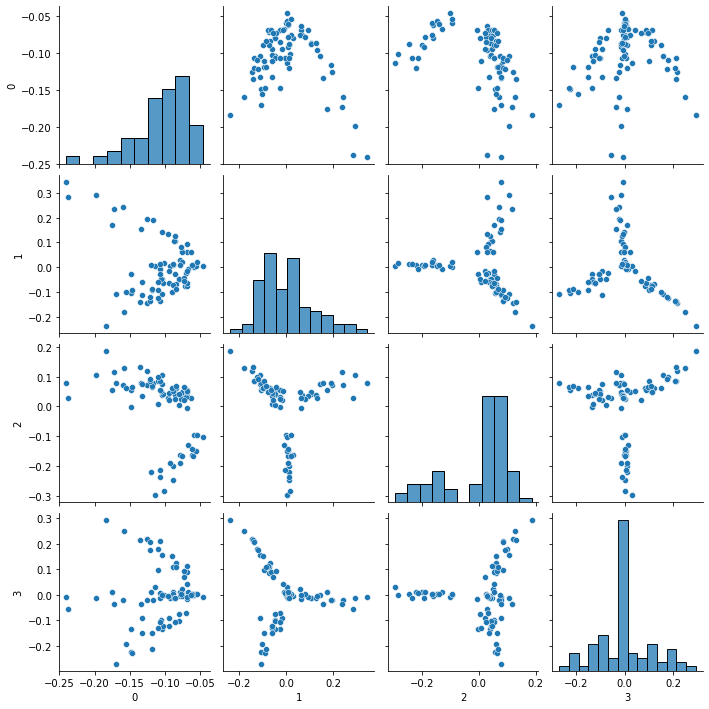

In [8]:
sns.pairplot(features)

In [9]:
labels= k_means(features, K)[1]
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

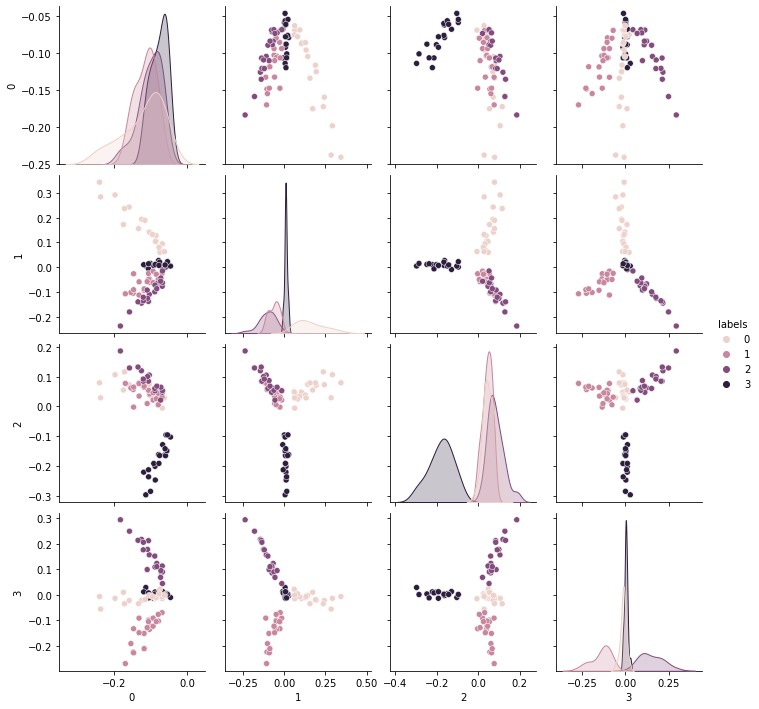

In [10]:
features["labels"] = labels
sns.pairplot(features, hue="labels")

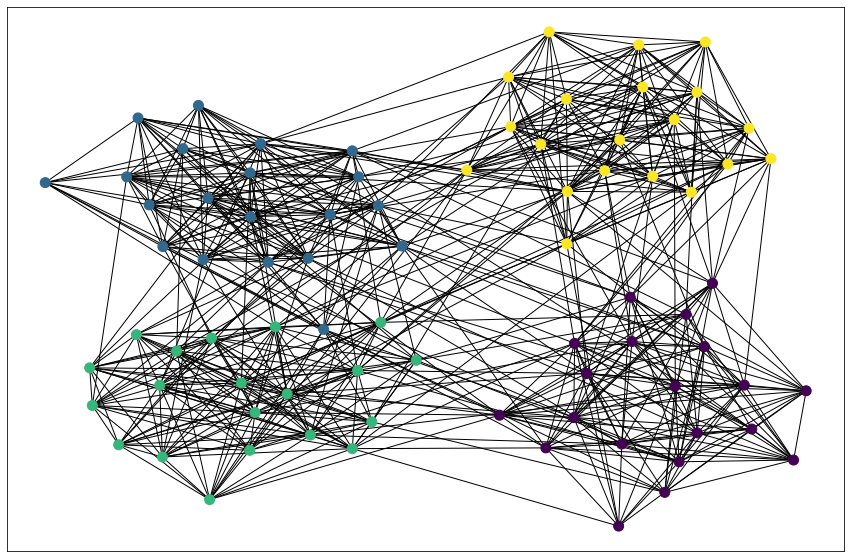

In [11]:
nx.draw_networkx(G, nx.spring_layout(G, iterations=10000), with_labels=False, node_size=100,ax=plt.subplots(figsize=(15,10))[1], node_color=labels)